## Observations and Insights 

In [37]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files

mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

data_combine = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview

data_combine

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [38]:
# Checking the number of mice.

num_mice = len(data_combine['Mouse ID'].unique())
num_mice

249

In [39]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_mice = data_combine[data_combine.duplicated(['Mouse ID','Timepoint'], keep = False)]

In [40]:
# Optional: Get all the data for the duplicate mouse ID. 

dup_mouse_list = dup_mice['Mouse ID'].unique()

In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

for mouse in dup_mouse_list:
    cleaned_data = data_combine.drop(data_combine.index[data_combine['Mouse ID'] == mouse], inplace = False)

In [42]:
# Checking the number of mice in the clean DataFrame.

cleaned_mice = len(cleaned_data['Mouse ID'].unique())
cleaned_mice

248

## Summary Statistics

In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drugs_group_mean = round(cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean(),2)
drugs_group_median = round(cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median(),2)
drugs_group_std = round(cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(),2)
drugs_group_var = round(cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(),2)
drugs_group_sem = round(cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem(),2)

drug_combine = pd.merge(drugs_group_mean, drugs_group_median, on = 'Drug Regimen')
drug_combine_two = pd.merge(drug_combine, drugs_group_std, on = 'Drug Regimen')

drug_combine_two_renamed = drug_combine_two.rename(columns={'Tumor Volume (mm3)_x' : 'Tumor Volume (mm3) Mean',
                                                            'Tumor Volume (mm3)_y' : 'Tumor Volume (mm3) Median',
                                                            'Tumor Volume (mm3)' : 'Tumor Volume (mm3) Std Deviation'})

drug_combine_three = pd.merge(drug_combine_two_renamed, drugs_group_var, on = 'Drug Regimen')
drug_combine_all = pd.merge(drug_combine_three, drugs_group_sem, on = 'Drug Regimen')

all_drugs_renamed = drug_combine_all.rename(columns={'Tumor Volume (mm3)_x' : 'Tumor Volume (mm3) Variance',
                                                     'Tumor Volume (mm3)_y' : 'Tumor Volume (mm3) SEM'})
all_drugs_renamed

,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Std Deviation,Tumor Volume (mm3) Variance,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,4.99,24.95,0.33
Ceftamin,52.59,51.78,6.27,39.29,0.47
Infubinol,52.88,51.82,6.57,43.13,0.49
Ketapril,55.24,53.70,8.28,68.55,0.60
Naftisol,54.33,52.51,8.13,66.17,0.60
Placebo,54.03,52.29,7.82,61.17,0.58
Propriva,52.32,50.45,6.62,43.85,0.54
Ramicane,40.22,40.67,4.85,23.49,0.32
Stelasyn,54.23,52.43,7.71,59.45,0.57


In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

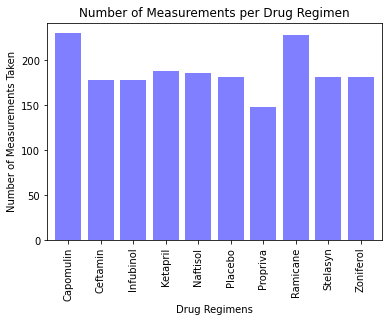

In [95]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

clean_group = cleaned_data.groupby('Drug Regimen').count()
clean_group_needed = clean_group[['Mouse ID']]

clean_group_needed.plot(kind="bar", color = 'blue', legend = False, alpha = 0.5, width = 0.8)

plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Measurements Taken")

plt.show()

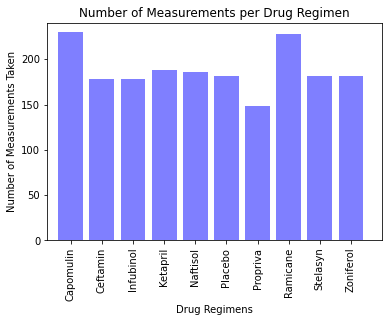

In [98]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = clean_group.index.to_list()
y_axis = clean_group['Mouse ID'].to_list()

plt.bar(x_axis, y_axis, color='blue', alpha=0.5, align='center')

plt.xticks(x_axis, rotation = 90)
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(y_axis)+10)

plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Measurements Taken")

plt.show()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
